In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import datetime

## Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [2]:
claims_data = pd.read_csv("./Data/claims.csv")

claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust_data = pd.read_csv("./Data/cust_demographics.csv")

cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
df = pd.merge(left =  cust_data,
              right = claims_data,
              left_on = "CUST_ID",
              right_on = "customer_id",
              how = "inner",
              indicator = True
             )

data = df
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both


In [5]:
data=df.drop(columns = '_merge')
data.dropna(inplace = True)

## Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [6]:
#Data Audit
d=data.dtypes[data.dtypes!='object'].index.values
data[d]=data[d].astype('float64')
mean=DataFrame({'mean':data[d].mean()})
std_dev=DataFrame({'std_dev':data[d].std()})
missing= DataFrame({'missing':data[d].isnull().sum()})
minimum=DataFrame({'min':data[d].min()})
maximum=DataFrame({'max':data[d].max()})
DA=pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)

c=data.dtypes[data.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':data[c].isnull().sum()})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
Da=pd.concat([Mean,Std_Dev,Missing,Minimum,Maximum],axis =1,sort = False)
Dq = pd.concat([DA,Da])

In [7]:
Dq.to_csv('./Output/DataAudit.csv')

In [8]:
dq = pd.read_csv("./Output/DataAudit.csv")
dq.rename(columns = {'Unnamed: 0':''}, inplace= True)

## Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [9]:
data['claim_amount'] = data['claim_amount'].astype(str)
data['claim_amount'] = data['claim_amount'].str.replace('$','')
data['claim_amount'] = pd.to_numeric(data['claim_amount'])

data.head()

<ipython-input-9-0dfc7c9dab50>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['claim_amount'] = data['claim_amount'].str.replace('$','')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No


## Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
data['Flag'] = np.where(data.police_report == 'Unknown',0,1)

data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1


## Q5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [11]:
data.drop_duplicates(subset = 'CUST_ID',keep = 'last').head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,1


## Q6. Check for missing values and impute the missing values with an appropriate value.(mean for continuous and mode for categorical)

In [12]:
#Categorical values
data['total_policy_claims'].replace(np.NaN,data['total_policy_claims'].mode()[0])

#Continous values
data['claim_amount'].replace(np.NaN,data['claim_amount'].mean())

data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1


## Q7. Calculate the age of customers in years. Based on the age, categorize the customers :

In [13]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(data['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
data['age'] = (np.where(dob_year > curr_year,v,y))

#Categorising
data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,43,Adult
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,52,Adult
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,38,Adult
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,38,Adult
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,36,Adult


 ## Q8. What is the average amount claimed by the customers from various segments?

In [14]:
data.groupby('Segment').mean()[['claim_amount']]

,claim_amount
Segment,
Gold,12723.927954
Platinum,12397.859420
Silver,12217.995298


## Q9. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [15]:
count = data.loc[((data.State == 'TX') | (data.State == 'DE') | (data.State == 'AK')) & (data.incident_cause == 'Driver error') & (data.AgeGroup == 'Adult'),['AgeGroup']].count()
count

AgeGroup    15
dtype: int64

## Q10. Draw a pie chart between the aggregated value of claim amount based on gender and segment.

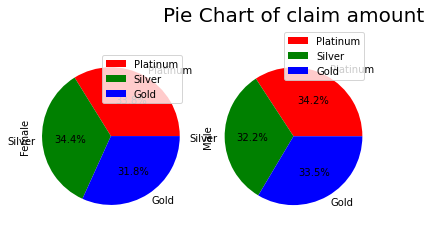

In [16]:
import matplotlib.pyplot as plt
# claim = data.groupby(['Segment','gender']).aggregate({'claim_amount':['sum']})
# claim
claim = pd.pivot_table(data, index =['Segment'],columns ='gender',values ='claim_amount')


claim.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots='true')

plt.title('Pie Chart of claim amount',fontsize=20)

plt.axis('equal')
plt.show()

## Q11. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [17]:
issue = data.loc[data['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = issue.groupby(['gender'])['claim_amount'].sum()
group_gender.nlargest(1)

gender
Male    3762289.0
Name: claim_amount, dtype: float64

<AxesSubplot:xlabel='gender'>

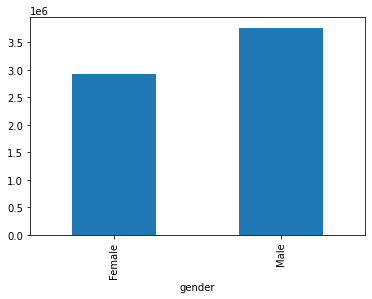

In [18]:
# Comparing using a bar chart
group_gender.plot(kind = 'bar')

### As we can see from the above figure and the value we got, it is been clear that male has claimed the most for any type of driver related issues.

## Q12. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<AxesSubplot:xlabel='AgeGroup'>

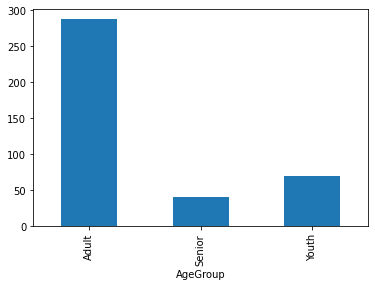

In [19]:
issue1 = data.loc[data['fraudulent'] == 'Yes']
group_age = issue1.groupby(['AgeGroup'])['total_policy_claims'].sum()
group_age.plot(kind = 'bar')

## Q13. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

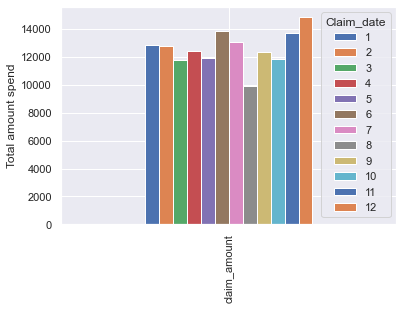

In [20]:
data['claim_date'] = pd.to_datetime(data['claim_date'])
data['Claim_date'] = data['claim_date'].dt.month
sns.set()

pd.pivot_table(data,columns ='Claim_date',values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.
### 14. Is there any similarity in the amount claimed by males and females? 

In [21]:
claim_male = data['claim_amount'].loc[data['gender']=="Male"]

claim_female = data['claim_amount'].loc[data['gender']=="Female"]

In [22]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12855.763565891473
The average amount claimed by females is 12033.19393939394


### Two Sample t-Test(Independent)

In [23]:
import scipy.stats as stats

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

0.9494491636619324

In [24]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

0.9501848470702697

In [25]:
# We'll cosider equal variance since the t score is not having a huge difference
uneq_var.statistic - eq_var.statistic

0.0007356834083372954

In [26]:
t = eq_var.statistic

p = eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is 0.9494491636619324 and the p-value is 0.34261956549002026
We fail to reject null hypothesis


* Since the significance value of the test is greater than 0.05, we can safely conclude that there is a similarity between amount claimed by males and females

### 15. Is there any relationship between age category and segment?

### Chi-Square Test

In [27]:
agecat_seg_xtab = pd.crosstab(data.AgeGroup, data.Segment, margins = True)
agecat_seg_xtab

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,258,256,241,755
Senior,25,22,19,66
Youth,64,67,59,190
All,347,345,319,1011


In [28]:
x2test_17 = stats.chi2_contingency(observed= agecat_seg_xtab)

x2test_17

(0.5727845766670779,
 0.9999455347941153,
 9,
 array([[ 259.13452028,  257.64094955,  238.22453017,  755.        ],
        [  22.65281899,   22.52225519,   20.82492582,   66.        ],
        [  65.21266073,   64.83679525,   59.95054402,  190.        ],
        [ 347.        ,  345.        ,  319.        , 1011.        ]]))

In [29]:
print("The chi square stat is {} and the p value is {}".format(x2test_17[0],x2test_17[1]))

The chi square stat is 0.5727845766670779 and the p value is 0.9999455347941153


* Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment